Stock Market Prediction Using Linear Regression

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
import pickle
import warnings
warnings.filterwarnings("ignore")

# Fetch Historical Stock Price Data

In [2]:
# Define Stock Symbol
stock_symbol = "Googl"

# Download historical data from Yahoo Finance
data = yf.download(stock_symbol, start='2010-01-01', end='2023-01-01')
data.head(100)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,15.689439,15.753504,15.621622,15.684434,15.684434,78169752
2010-01-05,15.695195,15.711712,15.554054,15.615365,15.615365,120067812
2010-01-06,15.662162,15.662162,15.174174,15.221722,15.221722,158988852
2010-01-07,15.250250,15.265265,14.831081,14.867367,14.867367,256315428
2010-01-08,14.814815,15.096346,14.742492,15.065566,15.065566,188783028
...,...,...,...,...,...,...
2010-05-20,12.138889,12.151652,11.856857,11.887137,11.887137,196335468
2010-05-21,11.738238,12.137137,11.621622,11.813063,11.813063,387244368
2010-05-24,12.030280,12.257007,11.931932,11.940941,11.940941,173650176


# Read Input Data

In [3]:
# Skip this step if you have done step 2
#Load data
googleData = pd.read_csv("Datasets/stocks_data/googleData.csv")
googleData.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-11-19,4.211713,4.233631,4.147454,4.219185,4.219185,352086780
1,2004-11-22,4.096396,4.221676,4.017691,4.112087,4.112087,496582362
2,2004-11-23,4.183569,4.254802,4.146956,4.172361,4.172361,498393124
3,2004-11-24,4.354179,4.413706,4.296645,4.352685,4.352685,613531078
4,2004-11-26,4.378588,4.483943,4.366633,4.468003,4.468003,260175560
5,2004-11-29,4.492162,4.556670,4.421178,4.509348,4.509348,428263241
6,2004-11-30,4.500880,4.557916,4.489423,4.532511,4.532511,309154460
7,2004-12-01,4.531764,4.545462,4.471988,4.482200,4.482200,315743063
8,2004-12-02,4.480705,4.520805,4.447081,4.468252,4.468252,251374696
9,2004-12-03,4.481951,4.509597,4.423420,4.493159,4.493159,235647968


# Understand Your Data

In [4]:
# Get information about your Data
googleData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4782 entries, 0 to 4781
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4782 non-null   object 
 1   Open       4782 non-null   float64
 2   High       4782 non-null   float64
 3   Low        4782 non-null   float64
 4   Close      4782 non-null   float64
 5   Adj Close  4782 non-null   float64
 6   Volume     4782 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 261.6+ KB


In [5]:
#Get a Statiscal Summary
googleData.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4782.000000,4782.000000,4782.000000,4782.000000,4782.000000,4.782000e+03
mean,41.776148,42.218915,41.351419,41.793448,41.793448,1.154349e+08
std,38.373494,38.814645,37.976296,38.401251,38.401251,1.452686e+08
min,4.096396,4.221676,4.017691,4.112087,4.112087,1.584340e+05
25%,13.054631,13.157122,12.908366,13.072065,13.072065,2.839050e+07
50%,26.693952,26.910000,26.483041,26.689864,26.689864,5.950214e+07
75%,57.537750,58.482376,57.173439,57.799502,57.799502,1.429900e+08
max,151.863495,152.100006,149.887497,150.709000,150.709000,1.650833e+09


In [6]:
# Get a summary of your Data
googleData.describe(include="all")

,Date,Open,High,Low,Close,Adj Close,Volume
count,4782,4782.000000,4782.000000,4782.000000,4782.000000,4782.000000,4.782000e+03
unique,4782,NaN,NaN,NaN,NaN,NaN,NaN
top,2004-11-19,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,41.776148,42.218915,41.351419,41.793448,41.793448,1.154349e+08
std,NaN,38.373494,38.814645,37.976296,38.401251,38.401251,1.452686e+08
min,NaN,4.096396,4.221676,4.017691,4.112087,4.112087,1.584340e+05
25%,NaN,13.054631,13.157122,12.908366,13.072065,13.072065,2.839050e+07
50%,NaN,26.693952,26.910000,26.483041,26.689864,26.689864,5.950214e+07
75%,NaN,57.537750,58.482376,57.173439,57.799502,57.799502,1.429900e+08


In [7]:
# Check for Null
googleData.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
googleData.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999902,0.999894,0.999770,0.999770,-0.472780
High,0.999902,1.000000,0.999873,0.999892,0.999892,-0.471800
Low,0.999894,0.999873,1.000000,0.999902,0.999902,-0.474107
Close,0.999770,0.999892,0.999902,1.000000,1.000000,-0.473075
Adj Close,0.999770,0.999892,0.999902,1.000000,1.000000,-0.473075
Volume,-0.472780,-0.471800,-0.474107,-0.473075,-0.473075,1.000000


In [9]:
#Set the method parameter to spearman
googleData.corr(method="spearman")

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999902,0.999867,0.999757,0.999757,-0.862286
High,0.999902,1.000000,0.999855,0.999880,0.999880,-0.860891
Low,0.999867,0.999855,1.000000,0.999895,0.999895,-0.864610
Close,0.999757,0.999880,0.999895,1.000000,1.000000,-0.863008
Adj Close,0.999757,0.999880,0.999895,1.000000,1.000000,-0.863008
Volume,-0.862286,-0.860891,-0.864610,-0.863008,-0.863008,1.000000


<AxesSubplot:>

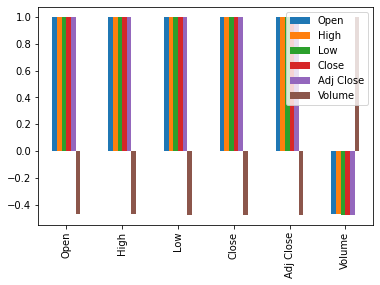

In [10]:
#Call the plot() method and set the kind parameter to bar
googleData.corr().plot(kind="bar")

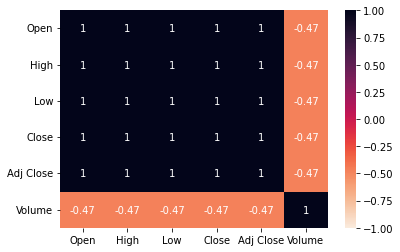

In [11]:
import seaborn as sns

sns.heatmap(googleData.corr(), vmin=-1, vmax=1,
annot=True,cmap="rocket_r")
plt.show()


# Data Preparation

In [12]:
# Drop unneccesary Columns
googleData.drop(['Adj Close', 'Volume'], axis=1, inplace=True)
googleData.head(20)

,Date,Open,High,Low,Close
0,2004-11-19,4.211713,4.233631,4.147454,4.219185
1,2004-11-22,4.096396,4.221676,4.017691,4.112087
2,2004-11-23,4.183569,4.254802,4.146956,4.172361
3,2004-11-24,4.354179,4.413706,4.296645,4.352685
4,2004-11-26,4.378588,4.483943,4.366633,4.468003
5,2004-11-29,4.492162,4.556670,4.421178,4.509348
6,2004-11-30,4.500880,4.557916,4.489423,4.532511
7,2004-12-01,4.531764,4.545462,4.471988,4.482200
8,2004-12-02,4.480705,4.520805,4.447081,4.468252
9,2004-12-03,4.481951,4.509597,4.423420,4.493159


In [13]:
# Drop all rows with null record
googleData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4782 entries, 0 to 4781
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4782 non-null   object 
 1   Open    4782 non-null   float64
 2   High    4782 non-null   float64
 3   Low     4782 non-null   float64
 4   Close   4782 non-null   float64
dtypes: float64(4), object(1)
memory usage: 186.9+ KB


# See Plots and Graphs

<AxesSubplot:>

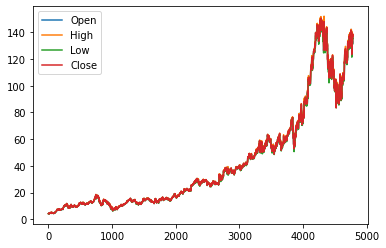

In [14]:
# Use the plot function to plot
googleData.plot()

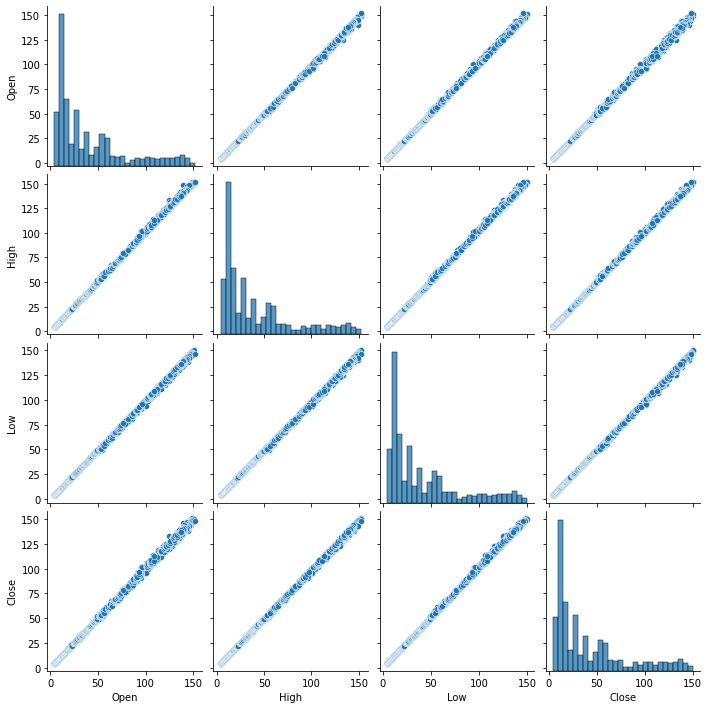

In [15]:
# Use seaborn to plot Data
sns.pairplot(googleData)

# Split Data into Training Data and Testing Data

In [16]:
#We will use Open, High and Low to predict Close
x= googleData[['Open', 'High', 'Low']].values #input
y= googleData[['Close']].values #Output
x
print(x)

[[  4.211713   4.233631   4.147454]
 [  4.096396   4.221676   4.017691]
 [  4.183569   4.254802   4.146956]
 ...
 [136.639999 136.839996 135.330002]
 [136.960007 138.880005 136.080002]
 [137.820007 138.       135.479996]]


In [17]:
# import train_test_split
from sklearn.model_selection import train_test_split
#spit data into two sets 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0) 

# Train Model

In [18]:
# Instantiate Linear Regression
model = LinearRegression()

#Train model
model.fit(x_train,y_train)

LinearRegression()

In [19]:
model.coef_

array([[-0.63890518,  0.80567303,  0.8331704 ]])

In [20]:
# Let's score this model using the test data
model.score(x_test, y_test)

0.9999188517055966

# Run Model Using Test Data

In [21]:
# Make prediction on test data
prediction = model.predict(x_test)

In [22]:
# Predict it
prediction

array([[ 59.23012508],
       [ 11.89693548],
       [ 47.6725332 ],
       [142.20883151],
       [ 65.36181412],
       [104.1629295 ],
       [ 19.18841781],
       [ 53.12259541],
       [ 14.52710348],
       [ 26.67452603],
       [ 46.32961794],
       [  8.90880651],
       [ 18.29991079],
       [ 61.10237052],
       [ 15.43339827],
       [ 31.01669073],
       [ 22.60792572],
       [ 53.23952951],
       [ 25.28671865],
       [  7.37437127],
       [ 12.23472207],
       [ 51.31265721],
       [ 14.80975591],
       [  8.43844614],
       [  4.74507274],
       [ 13.52513913],
       [ 15.33472872],
       [ 11.92316297],
       [ 60.81333463],
       [ 20.70965331],
       [ 11.27468353],
       [ 73.98851414],
       [141.76965776],
       [ 14.74693187],
       [ 21.97698616],
       [  8.51678481],
       [  7.68792716],
       [ 76.79787154],
       [ 15.06529987],
       [ 52.31569475],
       [ 17.0616239 ],
       [  8.59080599],
       [ 14.4219896 ],
       [ 34

# Check R Squared Value

In [23]:
# Import library
from sklearn.metrics import r2_score
r2_score(y_test, prediction)

0.9999188517055966

# Compare the Actual and Predicted Values

In [24]:
comparison = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': prediction.flatten()})
comparison.head(20)

,Actual,Predicted
0,59.476501,59.230125
1,11.805002,11.896935
2,47.889500,47.672533
3,141.647995,142.208832
4,65.248001,65.361814
5,104.794502,104.162929
6,19.182350,19.188418
7,53.516499,53.122595
8,14.520822,14.527103
9,26.731607,26.674526


# Plot Graph to Show Comparison

Text(0, 0.5, 'Closing Price')

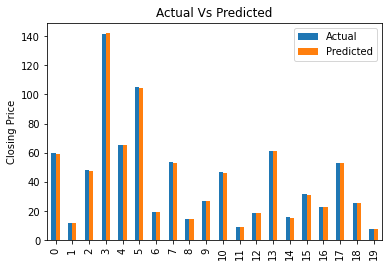

In [25]:
cGraph = comparison.head(20)
cGraph.plot(kind='bar')
plt.title('Actual Vs Predicted')
plt.ylabel('Closing Price')

# Model Evaluation

In [26]:
import math
from sklearn import metrics

#Metrics to find accuracy of continous variables
print('_____________________________________')
print('Mean Absolute Error (MAE)')
mav = metrics.mean_absolute_error(y_test, prediction)
print('MAE Value:' ,mav)

print('_____________________________________')
print('Mean Squared Error (MSE)')
mse = metrics.mean_squared_error(y_test, prediction)
print('MSE Value:' ,mse)

print('_____________________________________')
print('Root Mean Squared Error Value (RMSE)')
rmse = math.sqrt(metrics.mean_squared_error(y_test,prediction))
print('RMSE Value:' , rmse)

_____________________________________
Mean Absolute Error (MAE)
MAE Value: 0.1894684150177685
_____________________________________
Mean Squared Error (MSE)
MSE Value: 0.1152946446650223
_____________________________________
Root Mean Squared Error Value (RMSE)
RMSE Value: 0.33955065110381144
